In [116]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [117]:
df = pd.read_csv('Data miners 2022 (answers).csv')
df = df.reset_index(drop=True) # Remove the index from the file
df['class'] = 1 # Assign all points to class 1

#change Your height (in International inches)\nAlready, an awkward data storage format. It's good to be fluent in multiple systems! to height
df = df.rename(columns={'Your height (in International inches)\nAlready, an awkward data storage format. It\'s good to be fluent in multiple systems!':'height'})
#change Your mean shoe size (In European Continental system)	to shoe_size
df = df.rename(columns={'Your mean shoe size (In European Continental system)':'shoe_size'})

#remove all columns but shoe_size, height, and class
df = df[['height', 'shoe_size', 'class']]

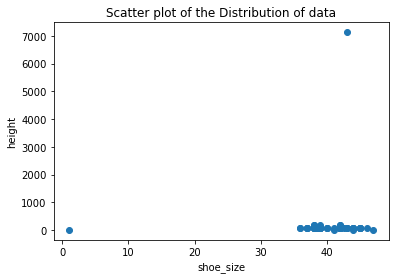

In [118]:
plt.title('Scatter plot of the Distribution of data')   #
plt.scatter(df['shoe_size'], df['height'])              # Visualizing the distribution

plt.xlabel('shoe_size')
plt.ylabel('height')

#remove observations that are 3 standard deviations from the mean
df = df[(np.abs(df.height-df.height.mean()) <= (3*df.height.std())) & (np.abs(df.shoe_size-df.shoe_size.mean()) <= (3*df.shoe_size.std()))]

plt.show()


In [119]:
def initializeMeans(df, k):

    means = df.sample(k)
    for i in range(k):
        means.iloc[i,2] = i
    
    return means

In [120]:
import math

#A helper function that calulates the euclidean distance between two points
def euclideanDistHelper(point1, point2):
    return math.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)

def euclideanDist(df,pointIDX,means):
    distances = []
    #loop over all the means
    for i in range(len(means)):
        #we calculate the euclidean distance between the point and the mean
        dist = euclideanDistHelper(df.iloc[pointIDX],means.iloc[i])
        #we append the distance to the list
        distances.append(dist)
    lowestDist = min(distances)
    df.loc[pointIDX, 'class'] = distances.index(lowestDist)
    return df


In [121]:

def updateMean(df,means):
    #Hwe create a new df that contains the new means
    newMeans = pd.DataFrame(columns=df.columns)
    
    #we loop over the the means
    for i in range(len(means)):
        meanClass = means.iloc[i-1]['class'] #get the class of the mean
        cluster = df[df['class'] == meanClass] #we select the points that belong to the cluster
        mean = cluster.mean() #we calculate the mean of the points in the cluster
        newMeans = newMeans.append(mean, ignore_index=True) #We append the mean to the newMeans df
    
    return newMeans

In [122]:

def Kmeans(df,iterations, k):
    means = initializeMeans(df, k)

    for iteration in range(iterations): 

        print("Iteration {}/{}".format(iteration,iteration))
        
        for i in range(len(df)):
            df = euclideanDist(df,i,means)
            
        means = updateMean(df, means)

    return df, means


Iteration 0/0
Iteration 1/1
Iteration 2/2
Iteration 3/3
Iteration 4/4


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_4095/999001619.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newMeans = newMeans.append(mean, ignore_index=True) #We append the mean to the newMeans df
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_4095/999001619.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newMeans = newMeans.append(mean, ignore_index=True) #We append the mean to the newMeans df
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_4095/999001619.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newMeans = newMeans.append(mean, ignore_index=True) #We append the mean to the newMeans df
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_4095/999001619.py:10

Iteration 5/5
Iteration 6/6
Iteration 7/7
Iteration 8/8
Iteration 9/9


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_4095/999001619.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newMeans = newMeans.append(mean, ignore_index=True) #We append the mean to the newMeans df
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_4095/999001619.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newMeans = newMeans.append(mean, ignore_index=True) #We append the mean to the newMeans df
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_4095/999001619.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newMeans = newMeans.append(mean, ignore_index=True) #We append the mean to the newMeans df
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_4095/999001619.py:10

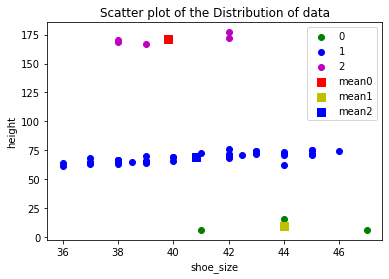

In [123]:
df = df.reset_index(drop=True) # Remove index from file

dff, means = Kmeans(df,10,3)

plt.clf()

plt.title('Scatter plot of the Distribution of data')   #

plt.scatter(df.loc[df['class'] == 0]['shoe_size'],df.loc[df['class'] == 0]['height'],color='g',label='0')  
plt.scatter(df.loc[df['class'] == 1]['shoe_size'],df.loc[df['class'] == 1]['height'],color='b',label='1')  
plt.scatter(df.loc[df['class'] == 2]['shoe_size'],df.loc[df['class'] == 2]['height'],color='m',label='2')

plt.scatter(means.iloc[0].loc['shoe_size'],means.iloc[0].loc['height'],s=70,label='mean0',marker='s',color='r')                    # Visualizing the final class distribution
plt.scatter(means.iloc[1].loc['shoe_size'],means.iloc[1].loc['height'],s=70,label='mean1',marker='s',color='y')
plt.scatter(means.iloc[2].loc['shoe_size'],means.iloc[2].loc['height'],s=70,label='mean2',marker='s',color='b')

plt.xlabel('shoe_size')
plt.ylabel('height')
plt.legend()
plt.show()